# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
X_train.shape # num of samples, width, and height

(60000, 28, 28)

In [4]:
# Preprocess the data

# Reshape the images
X_train = X_train.reshape(X_train.shape[0], X_train[0].shape[0], X_train[0].shape[1], 1) # num of samples, width, hieght, and channel
X_test = X_test.reshape(X_test.shape[0], X_test[0].shape[0], X_test[0].shape[1], 1)

# Normalize the values of the pixels
X_train = X_train/255.0
X_test = X_test/255.0

#Turn labels into categories
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [5]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [6]:
# Compile the model
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size= 128, epochs= 5)


Epoch 1/5
469/469 [==============================] - 63s 131ms/step - loss: 0.3448 - accuracy: 0.8930 - val_loss: 0.0967 - val_accuracy: 0.9693
Epoch 2/5
469/469 [==============================] - 49s 105ms/step - loss: 0.1001 - accuracy: 0.9692 - val_loss: 0.0831 - val_accuracy: 0.9760
Epoch 3/5
469/469 [==============================] - 51s 108ms/step - loss: 0.0718 - accuracy: 0.9781 - val_loss: 0.0578 - val_accuracy: 0.9830
Epoch 4/5
469/469 [==============================] - 55s 117ms/step - loss: 0.0560 - accuracy: 0.9830 - val_loss: 0.0556 - val_accuracy: 0.9824
Epoch 5/5
469/469 [==============================] - 50s 107ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0496 - val_accuracy: 0.9864


## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 3s 11ms/step - loss: 0.0496 - accuracy: 0.9864
Test Accuracy: 0.9864000082015991


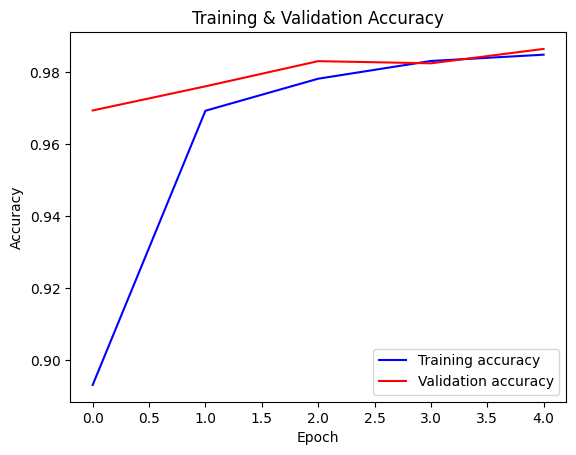

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, 'b', label='Training accuracy')
plt.plot(val_acc, 'r', label='Validation accuracy')
plt.title('Training & Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
